In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('../data/ISTHaneHalkiBirliktelik.csv',sep=',',names=["blank","date","year","rate"])
data = data.drop(["blank"],axis=1)
data = data.drop([0,1,2,3],axis=0)
data.rate = data.rate.astype(float)
data

date    year  rate
4      Hafta Sonu Akşam Yemeği  2016.0  81.2
5  Hafta Sonu Sabah Kahvaltısı  2016.0  72.0
6       Hafta Sonu Öğle Yemeği  2016.0  55.1
7       Hafta İçi Akşam Yemeği  2016.0  72.7
8   Hafta İçi Sabah Kahvaltısı  2016.0  25.5
9        Hafta İçi Öğle Yemeği  2016.0  12.4

In [2]:
dates = {
    "Hafta Sonu Akşam Yemeği" : "HS-17.00/06.00",
    "Hafta Sonu Sabah Kahvaltısı" : "HS-06.00/09.00",
    "Hafta Sonu Öğle Yemeği" : "HS-09.00/17.00",
    "Hafta İçi Akşam Yemeği" : "Hİ-17.00/06.00",
    "Hafta İçi Sabah Kahvaltısı" : "Hİ-06.00/11.00",
    "Hafta İçi Öğle Yemeği" : "Hİ-11.00/17.00",
}

In [3]:
data.date = data.date.map(dates)
data

date    year  rate
4  HS-17.00/06.00  2016.0  81.2
5  HS-06.00/09.00  2016.0  72.0
6  HS-09.00/17.00  2016.0  55.1
7  Hİ-17.00/06.00  2016.0  72.7
8  Hİ-06.00/11.00  2016.0  25.5
9  Hİ-11.00/17.00  2016.0  12.4

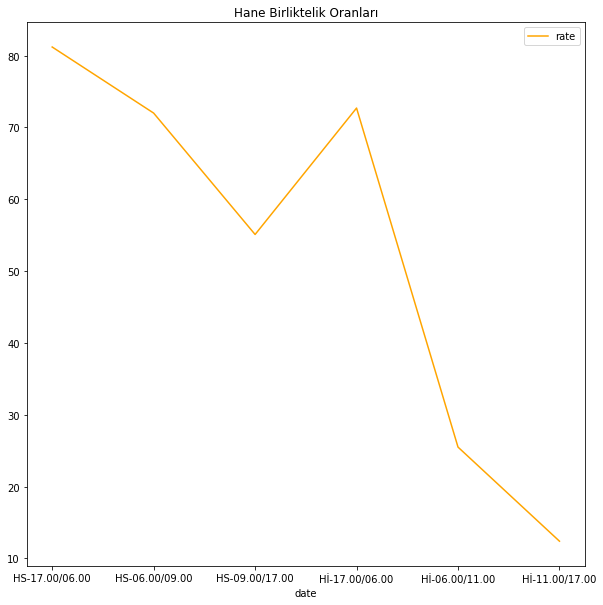

In [4]:
data.plot(x='date',y='rate',color='Orange',title='Hane Birliktelik Oranları',figsize=(10,10))

In [5]:
istanbul_nufus = 15519267
data['ayri_nufus'] = data.rate.apply(lambda x: (((100-x)*istanbul_nufus)//100))
data

date    year  rate  ayri_nufus
4  HS-17.00/06.00  2016.0  81.2   2917622.0
5  HS-06.00/09.00  2016.0  72.0   4345394.0
6  HS-09.00/17.00  2016.0  55.1   6968150.0
7  Hİ-17.00/06.00  2016.0  72.7   4236759.0
8  Hİ-06.00/11.00  2016.0  25.5  11561853.0
9  Hİ-11.00/17.00  2016.0  12.4  13594877.0

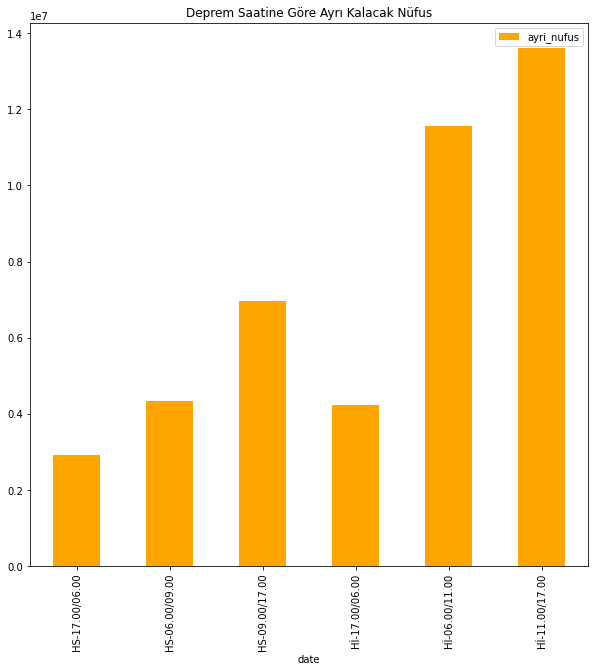

In [6]:
data.plot.bar(x='date',y='ayri_nufus',color='Orange',figsize=(10,10),title=('Deprem Saatine Göre Ayrı Kalacak Nüfus'))